<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("exampleData.csv")
df.head()

,Average speed,Average distance wall
0,32.473008,86.727505
1,31.140416,85.886254
2,31.277370,76.872820
3,31.981650,88.744627
4,31.886575,80.815665


In [3]:
df = df.rename(columns={'Average speed': 'Average_speed', 'Average distance wall': 'Average_distance_wall'})

Text(0, 0.5, 'Average_distance_wall')

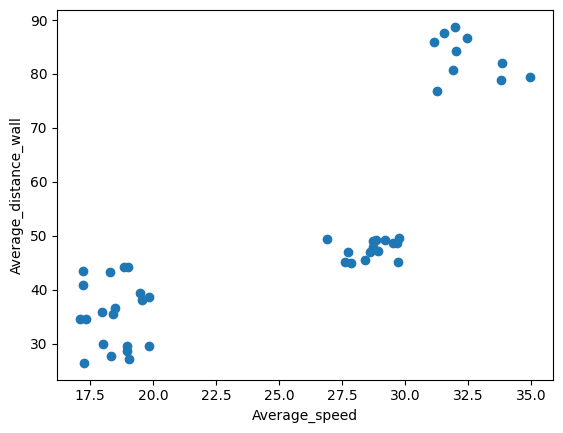

In [4]:
plt.scatter(df['Average_speed'],df['Average_distance_wall'])
plt.xlabel('Average_speed')
plt.ylabel('Average_distance_wall')

In [5]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Average_speed','Average_distance_wall']])
    sse.append(km.inertia_)

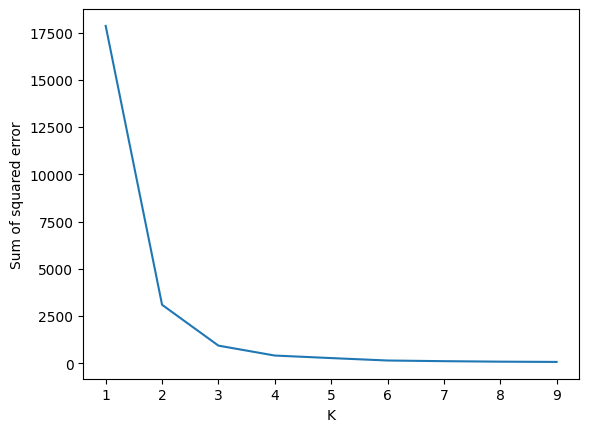

In [6]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [7]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Average_speed','Average_distance_wall']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [8]:
df['cluster']=y_predicted
df.head()

,Average_speed,Average_distance_wall,cluster
0,32.473008,86.727505,0
1,31.140416,85.886254,0
2,31.277370,76.872820,0
3,31.981650,88.744627,0
4,31.886575,80.815665,0


In [9]:
## centroid
km.cluster_centers_

array([[32.49950757, 83.11545013],
       [18.45597469, 35.43722556],
       [28.67872804, 47.58901601]])

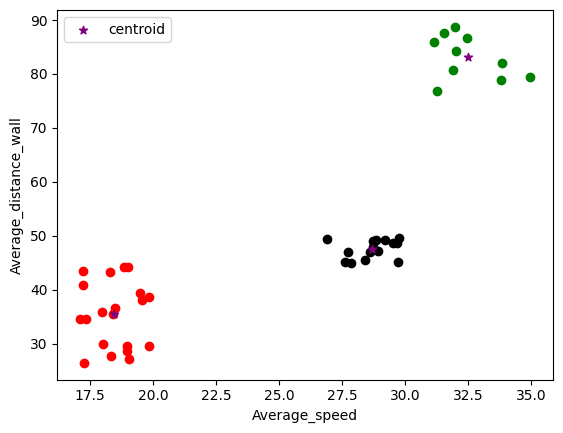

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Average_speed'],df1['Average_distance_wall'],color='green')
plt.scatter(df2['Average_speed'],df2['Average_distance_wall'],color='red')
plt.scatter(df3['Average_speed'],df3['Average_distance_wall'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Average_speed')
plt.ylabel('Average_distance_wall')
plt.legend()